In [12]:
import madmom
import numpy as np
import matplotlib.pyplot as plt

In [4]:


audio_fname = "datasets/slurtest_add/slurtest_add_audio/slurtest05_FK.wav"
signal = madmom.audio.signal.Signal(audio_fname)
frames = madmom.audio.signal.FramedSignal(signal)

/usr/local/lib/python3.9/site-packages/madmom/io/audio.py:493: WavFileWarning: Chunk (non-data) not understood, skipping it.
  file_sample_rate, signal = wavfile.read(filename, mmap=True)


In [6]:
energy = madmom.audio.signal.energy(frames)

In [38]:
e_thres = 0.25 # How to set?

In [39]:
def e_m(env, env_m):
    return np.mean(np.abs(env-env_m))/np.mean(env)

In [40]:
from scipy.signal import butter,filtfilt

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / (0.5*fs)
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [41]:
n_show = 500

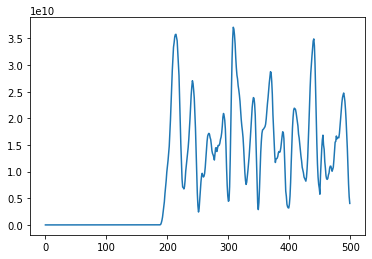

In [42]:
plt.plot(energy[:n_show])

In [43]:
envs = [butter_lowpass_filter(energy, f0, sample_rate, 4) for f0 in [100,200,400,800,1600]]

es = [e_m(energy, env_m) for env_m in envs]
print(es)


[0.5059270635233258, 0.48237999340968934, 0.43782163810485486, 0.356187212005874, 0.23889306001046914]


In [50]:
m = np.where(np.array(es)<e_thres)[0][0]
print(m)

4


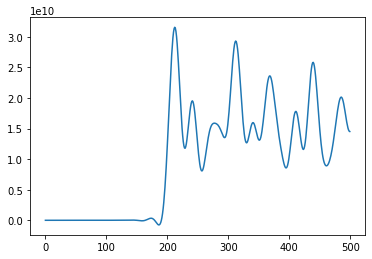

In [56]:
# last smoothed envelope

env_m = envs[m]
plt.plot(env_m[:n_show])

In [61]:
# Obtain derivatives
dx = 1/2048
first_derivative = np.diff(env_m)
second_derivative = np.diff(first_derivative)

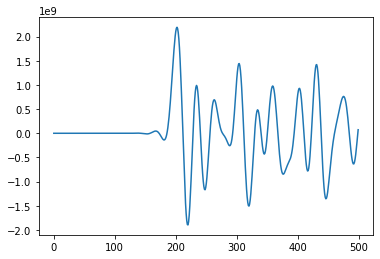

In [60]:
plt.plot(first_derivative[:n_show])


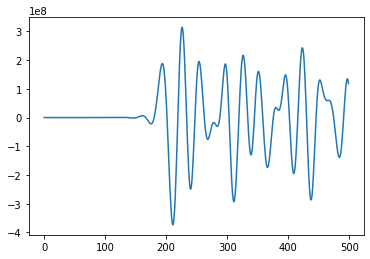

In [62]:
plt.plot(second_derivative[:n_show])

(0.0, 500.0)

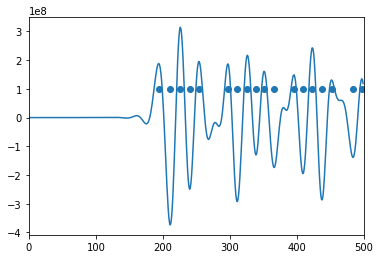

In [88]:
import scipy
peaks = 



In [96]:
second_derivative = second_derivative[:n_show]
peaks = scipy.signal.find_peaks(np.abs(second_derivative), height=1e8)[0]

(0.0, 500.0)

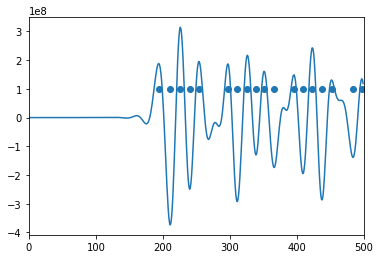

In [97]:
plt.plot(second_derivative)
plt.scatter(peaks, np.ones_like(peaks)*1e8)
plt.xlim([0,n_show])

In [99]:
# Select top n 
n = 10 

positions = np.argsort(second_derivative[peaks])
peaks[positions]
peaks = peaks[positions][:n]

(0.0, 500.0)

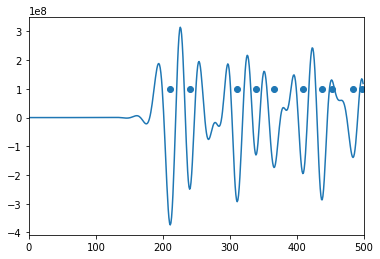

In [100]:
plt.plot(second_derivative)
plt.scatter(peaks, np.ones_like(peaks)*1e8)
plt.xlim([0,n_show])